<a href="https://colab.research.google.com/github/adityajivoji/autoencoder/blob/main/denoising_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import torch
import numpy as np
import torchvision
from torch.utils.data import DataLoader
from torch import nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import optim
from torch.nn import functional as F
from matplotlib import pyplot as plt

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # checking device type

In [ ]:
class dae(nn.Module):
    def __init__(self):
        super(dae, self).__init__()
        self.encode_sequence = nn.Sequential(nn.Linear(784, 500), nn.ReLU(), nn.Linear(500, 300), nn.ReLU(), nn.Linear(300, 80), nn.ReLU(), nn.Linear(80, 10))
        self.decode_sequence = nn.Sequential(nn.Linear(10, 80), nn.ReLU(), nn.Linear(80, 300), nn.ReLU(), nn.Linear(300, 500), nn.ReLU(), nn.Linear(500, 784) ,nn.Sigmoid())

    def forward(self, X):
        encoded_data = self.encode_sequence(X)
        decoded_data = self.decode_sequence(encoded_data)
        return decoded_data

In [ ]:
# Initializing values
model = dae().to(device)
learning_rate = 0.001
num_epoch = 10
batch_size = 64
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Loading Dataset
train_dataset = datasets.MNIST(root = '.', train= True, transform = transforms.ToTensor(), download = True)
train_loader = DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_dataset = datasets.MNIST(root = '.', train= False, transform = transforms.ToTensor(), download = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = True)

In [ ]:
# Function to add noise
def add_noise(input):
    noise = torch.rand(input.shape) / 3
    input  = input + noise.to(device=device)
    return input

In [ ]:
losses = []
record = []
for epoch in range(num_epoch): # number of iterations
    for _, (data, _) in enumerate(train_loader , 0): # one min-batch goes through each iteration of size 64
        # Converting to acceptable format
        data = data.to(device=device)
        data = data.reshape(-1, 28*28)
        temp = add_noise(data)
        output = model(temp)
        loss = criterion(output, data)
        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()
        losses.append(loss)
        record.append([i, data, output])


In [ ]:
data = data.reshape(-1, 28,28)

In [ ]:
output = output.reshape(-1, 28, 28)

In [ ]:
temp = temp.reshape(-1, 28 ,28)

In [ ]:
print(data.shape, output.shape)


torch.Size([32, 28, 28]) torch.Size([32, 28, 28])


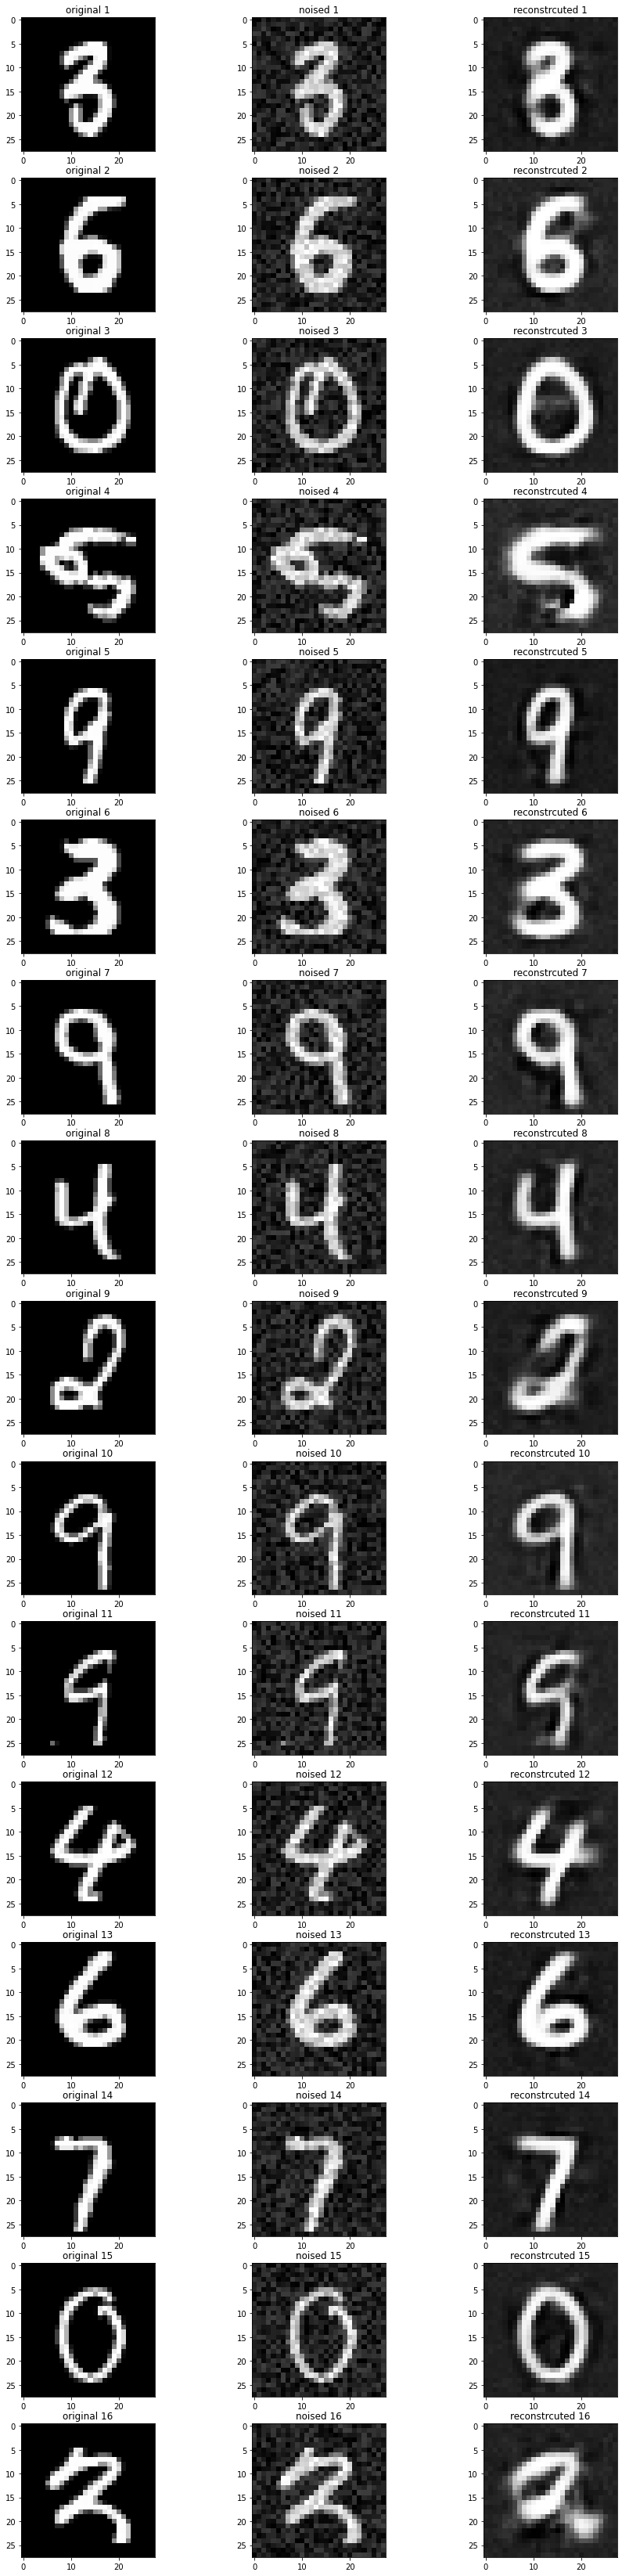

In [ ]:
plt.figure(figsize = (15 ,120 ))
for i in range(16):
    plt.subplot(32,3,3 * i + 1)
    plt.imshow(data[i].cpu().detach().numpy())
    plt.gray()
    plt.title("original "+str(i + 1))
    plt.subplot(32,3,3 * i + 2)
    plt.imshow(temp[i].cpu().detach().numpy())
    plt.gray()
    plt.title("noised " + str(i + 1))
    plt.subplot(32,3,3 * i + 3)
    plt.imshow(output[i].cpu().detach().numpy())
    plt.gray()
    plt.title("reconstrcuted " + str(i + 1))


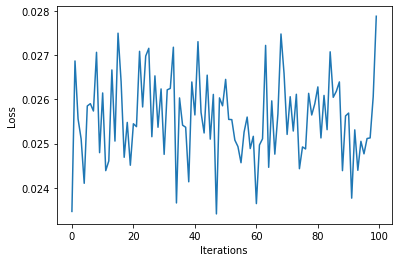

In [ ]:
plt.xlabel('Iterations')
plt.ylabel('Loss')
  
# Plotting the last 100 values
plt.plot(losses[-100:])

In [ ]:
for epoch in range(num_epoch): # number of iterations
    for _, (data1, _) in enumerate(test_loader , 0): # one min-batch goes through each iteration of size 64
        # Converting to acceptable format
        data1 = data1.to(device=device)
        
        data1 = data1.reshape(-1, 28*28)
        temp1 = add_noise(data1)
        output1 = model(temp1)

In [ ]:
data1 = data1.reshape(-1, 28,28)

In [ ]:
output1 = output1.reshape(-1, 28, 28)

In [ ]:
temp1 = temp1.reshape(-1, 28 ,28)

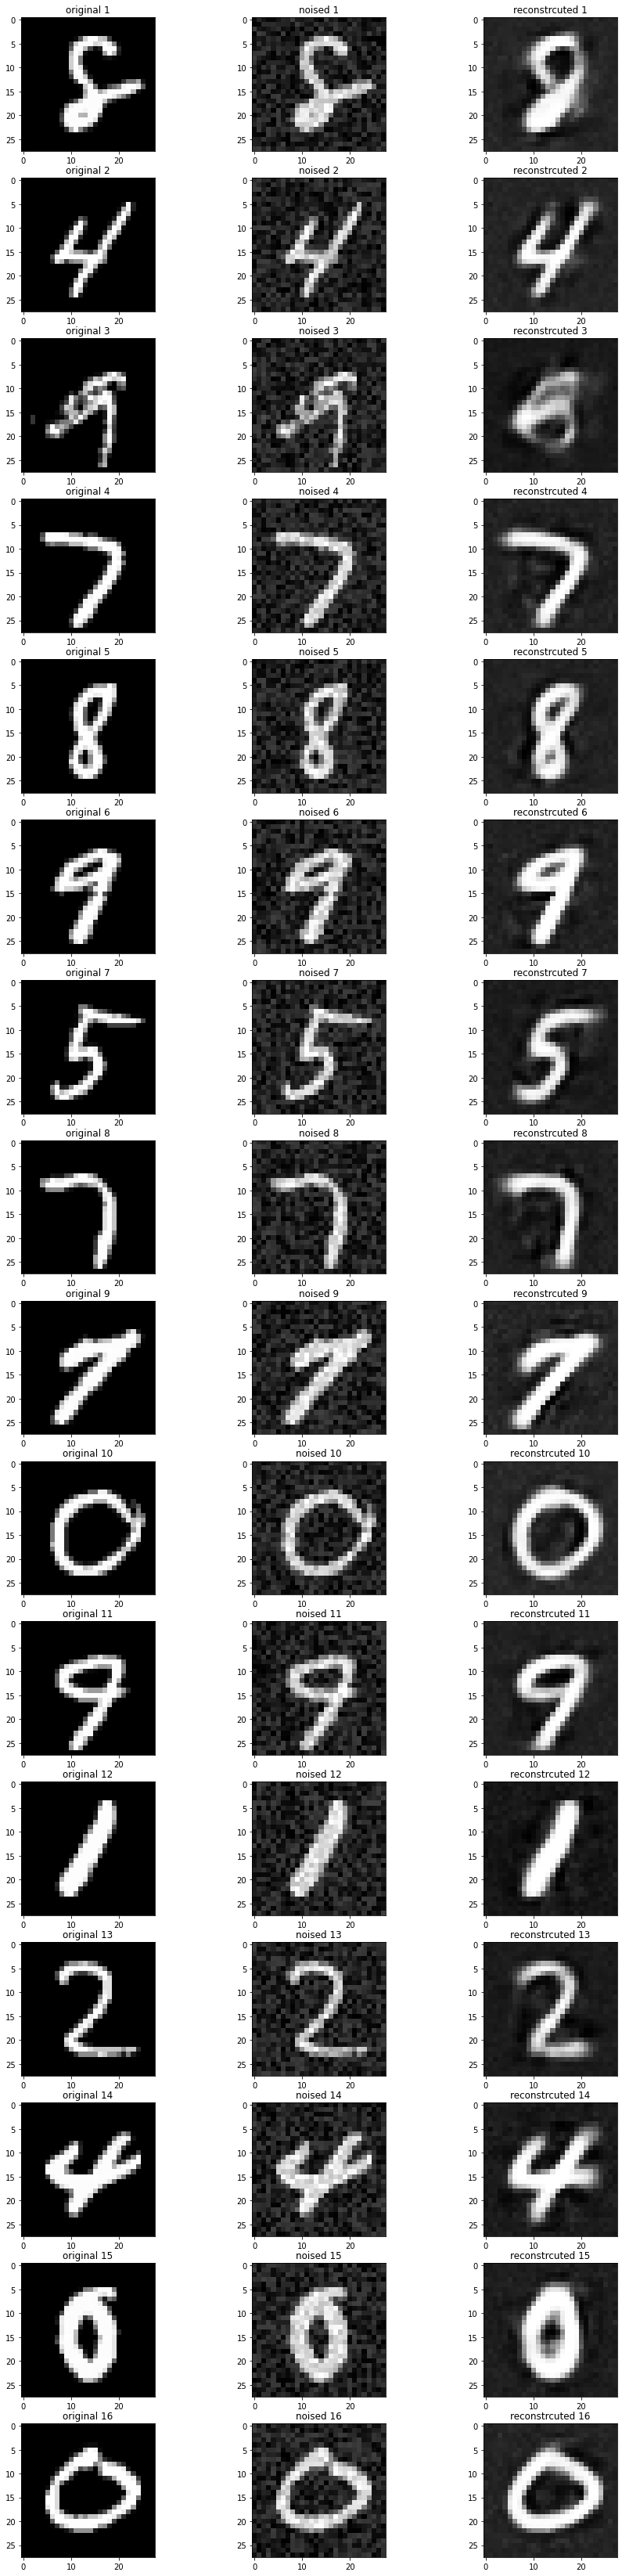

In [ ]:
plt.figure(figsize = (15 ,120 ))
for i in range(16):
    plt.subplot(32,3,3 * i + 1)
    plt.imshow(data1[i].cpu().detach().numpy())
    plt.gray()
    plt.title("original "+str(i + 1))
    plt.subplot(32,3,3 * i + 2)
    plt.imshow(temp1[i].cpu().detach().numpy())
    plt.gray()
    plt.title("noised " + str(i + 1))
    plt.subplot(32,3,3 * i + 3)
    plt.imshow(output1[i].cpu().detach().numpy())
    plt.gray()
    plt.title("reconstrcuted " + str(i + 1))